# 1. Import and Install Dependencies

In [89]:
#!pip install tensorflow tensorflow-gpu  opencv-python mediapipe sklearn matplotlib

In [90]:
#!pip install mediapipe

In [187]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [188]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [189]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [190]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION ) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [191]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION , 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [193]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [194]:
len(results.left_hand_landmarks.landmark)

21

In [195]:
results

mediapipe.python.solution_base.SolutionOutputs

In [196]:
draw_landmarks(frame, results)

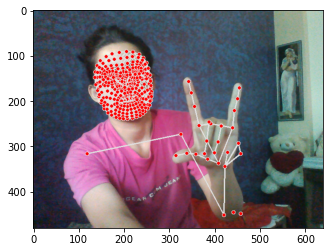

In [197]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [198]:
len(results.left_hand_landmarks.landmark)

21

In [199]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [200]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [201]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() 
    if results.face_landmarks 
    else np.zeros(1404)


IndentationError: unexpected indent (1373052555.py, line 2)

In [202]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [203]:
result_test = extract_keypoints(results)

In [204]:
result_test

array([ 0.31667882,  0.35491678, -0.61609352, ...,  0.        ,
        0.        ,  0.        ])

In [205]:
468*3+33*4+21*3+21*3

1662

In [206]:
np.save('0', result_test)

In [207]:
np.load('0.npy')

array([ 0.31667882,  0.35491678, -0.61609352, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [208]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [209]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [210]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [211]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [212]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [213]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [214]:
label_map = {label:num for num, label in enumerate(actions)}

In [215]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [216]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [217]:
np.array(sequences).shape

(90, 30, 1662)

In [218]:
np.array(labels).shape

(90,)

In [219]:
X = np.array(sequences)

In [220]:
X.shape

(90, 30, 1662)

In [221]:
y = to_categorical(labels).astype(int)

In [222]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [224]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [225]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [226]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [227]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [228]:
res = [.7, 0.2, 0.1]

In [229]:
actions[np.argmax(res)]

'hello'

In [230]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [275]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 12s 3s/step - loss: 4.1376 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 120ms/step - loss: 5.6953 - categorical_accuracy: 0.3765
Epoch 3/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.5435 - categorical_accuracy: 0.3529
Epoch 4/2000
3/3 [==============================] - 0s 114ms/step - loss: 4.3619 - categorical_accuracy: 0.4000
Epoch 5/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.2997 - categorical_accuracy: 0.3294
Epoch 6/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1010 - categorical_accuracy: 0.4000
Epoch 7/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.1046 - categorical_accuracy: 0.4118
Epoch 8/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.3891 - categorical_accuracy: 0.3059
Epoch 9/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.1172 - categorical_accuracy: 0

3/3 [==============================] - 0s 120ms/step - loss: 0.9469 - categorical_accuracy: 0.5294
Epoch 146/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.9772 - categorical_accuracy: 0.4000
Epoch 147/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.9604 - categorical_accuracy: 0.4941
Epoch 148/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.9976 - categorical_accuracy: 0.4235
Epoch 149/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.9364 - categorical_accuracy: 0.5176
Epoch 150/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.9597 - categorical_accuracy: 0.4471
Epoch 151/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.9658 - categorical_accuracy: 0.4235
Epoch 152/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.9074 - categorical_accuracy: 0.6471
Epoch 153/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.9324 - categorical_accura

Epoch 217/2000
3/3 [==============================] - 0s 113ms/step - loss: 29.3302 - categorical_accuracy: 0.3412
Epoch 218/2000
3/3 [==============================] - 0s 122ms/step - loss: 30.6102 - categorical_accuracy: 0.3529
Epoch 219/2000
3/3 [==============================] - 0s 113ms/step - loss: 15.6864 - categorical_accuracy: 0.2235
Epoch 220/2000
3/3 [==============================] - 0s 109ms/step - loss: 14.5894 - categorical_accuracy: 0.2941
Epoch 221/2000
3/3 [==============================] - 0s 117ms/step - loss: 7.4768 - categorical_accuracy: 0.3294
Epoch 222/2000
3/3 [==============================] - 0s 107ms/step - loss: 9.4087 - categorical_accuracy: 0.2941
Epoch 223/2000
3/3 [==============================] - 0s 120ms/step - loss: 7.3790 - categorical_accuracy: 0.3059
Epoch 224/2000
3/3 [==============================] - 0s 115ms/step - loss: 6.7920 - categorical_accuracy: 0.3294
Epoch 225/2000
3/3 [==============================] - 0s 112ms/step - loss: 4.2918 -

3/3 [==============================] - 0s 109ms/step - loss: 0.9933 - categorical_accuracy: 0.5059
Epoch 360/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0007 - categorical_accuracy: 0.5412
Epoch 361/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0507 - categorical_accuracy: 0.4471
Epoch 362/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0413 - categorical_accuracy: 0.4941
Epoch 363/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0503 - categorical_accuracy: 0.5529
Epoch 364/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0531 - categorical_accuracy: 0.5412
Epoch 365/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0517 - categorical_accuracy: 0.5529
Epoch 366/2000
3/3 [==============================] - 0s 116ms/step - loss: 1.0516 - categorical_accuracy: 0.5176
Epoch 367/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.0478 - categorical_accura

Epoch 431/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6845 - categorical_accuracy: 0.6824
Epoch 432/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.7470 - categorical_accuracy: 0.6000
Epoch 433/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.6708 - categorical_accuracy: 0.7294
Epoch 434/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.6640 - categorical_accuracy: 0.7294
Epoch 435/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.6288 - categorical_accuracy: 0.7294
Epoch 436/2000
3/3 [==============================] - 0s 117ms/step - loss: 0.6635 - categorical_accuracy: 0.7647
Epoch 437/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5876 - categorical_accuracy: 0.7529
Epoch 438/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.5318 - categorical_accuracy: 0.7882
Epoch 439/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.6511 - cat

Epoch 574/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.2525 - categorical_accuracy: 0.9529
Epoch 575/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.3027 - categorical_accuracy: 0.9059
Epoch 576/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.3408 - categorical_accuracy: 0.8353
Epoch 577/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.3203 - categorical_accuracy: 0.8824
Epoch 578/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.3777 - categorical_accuracy: 0.8353
Epoch 579/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2876 - categorical_accuracy: 0.8824
Epoch 580/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.2813 - categorical_accuracy: 0.9294
Epoch 581/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.2904 - categorical_accuracy: 0.8824
Epoch 582/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.4679 - cat

Epoch 717/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.1171 - categorical_accuracy: 0.9765
Epoch 718/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.1261 - categorical_accuracy: 0.9765
Epoch 719/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.1145 - categorical_accuracy: 0.9765
Epoch 720/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.1272 - categorical_accuracy: 0.9647
Epoch 721/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.1161 - categorical_accuracy: 0.9647
Epoch 722/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0961 - categorical_accuracy: 0.9765
Epoch 723/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.1450 - categorical_accuracy: 0.9412
Epoch 724/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.1346 - categorical_accuracy: 0.9412
Epoch 725/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.3369 - cat

Epoch 860/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0528 - categorical_accuracy: 0.9765
Epoch 861/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0511 - categorical_accuracy: 0.9882
Epoch 862/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0496 - categorical_accuracy: 0.9765
Epoch 863/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0463 - categorical_accuracy: 0.9765
Epoch 864/2000
3/3 [==============================] - 0s 114ms/step - loss: 0.0458 - categorical_accuracy: 0.9882
Epoch 865/2000
3/3 [==============================] - 0s 105ms/step - loss: 0.0437 - categorical_accuracy: 0.9765
Epoch 866/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0402 - categorical_accuracy: 0.9765
Epoch 867/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0439 - categorical_accuracy: 0.9882
Epoch 868/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0427 - cat

Epoch 1003/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1004/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.0019 - categorical_accuracy: 1.0000
Epoch 1005/2000
3/3 [==============================] - 0s 113ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1006/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1007/2000
3/3 [==============================] - 0s 108ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1008/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1009/2000
3/3 [==============================] - 0s 106ms/step - loss: 0.0018 - categorical_accuracy: 1.0000
Epoch 1010/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0017 - categorical_accuracy: 1.0000
Epoch 1011/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.0

Epoch 1142/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.9813e-04 - categorical_accuracy: 1.0000
Epoch 1143/2000
3/3 [==============================] - 0s 115ms/step - loss: 4.9440e-04 - categorical_accuracy: 1.0000
Epoch 1144/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.9352e-04 - categorical_accuracy: 1.0000
Epoch 1145/2000
3/3 [==============================] - 0s 105ms/step - loss: 4.8859e-04 - categorical_accuracy: 1.0000
Epoch 1146/2000
3/3 [==============================] - 0s 121ms/step - loss: 4.8451e-04 - categorical_accuracy: 1.0000
Epoch 1147/2000
3/3 [==============================] - 0s 104ms/step - loss: 4.8160e-04 - categorical_accuracy: 1.0000
Epoch 1148/2000
3/3 [==============================] - 0s 108ms/step - loss: 4.8259e-04 - categorical_accuracy: 1.0000
Epoch 1149/2000
3/3 [==============================] - 0s 106ms/step - loss: 4.7477e-04 - categorical_accuracy: 1.0000
Epoch 1150/2000
3/3 [===========================

3/3 [==============================] - 0s 109ms/step - loss: 2.0943e-04 - categorical_accuracy: 1.0000
Epoch 1279/2000
3/3 [==============================] - 0s 118ms/step - loss: 2.0816e-04 - categorical_accuracy: 1.0000
Epoch 1280/2000
3/3 [==============================] - 0s 105ms/step - loss: 2.0741e-04 - categorical_accuracy: 1.0000
Epoch 1281/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.0681e-04 - categorical_accuracy: 1.0000
Epoch 1282/2000
3/3 [==============================] - 0s 106ms/step - loss: 2.0604e-04 - categorical_accuracy: 1.0000
Epoch 1283/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.0476e-04 - categorical_accuracy: 1.0000
Epoch 1284/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.0432e-04 - categorical_accuracy: 1.0000
Epoch 1285/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.0412e-04 - categorical_accuracy: 1.0000
Epoch 1286/2000
3/3 [==============================] - 0s 106ms/

Epoch 1347/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.6012e-04 - categorical_accuracy: 1.0000
Epoch 1348/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.5961e-04 - categorical_accuracy: 1.0000
Epoch 1349/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.5922e-04 - categorical_accuracy: 1.0000
Epoch 1350/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.5858e-04 - categorical_accuracy: 1.0000
Epoch 1351/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.5790e-04 - categorical_accuracy: 1.0000
Epoch 1352/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.5731e-04 - categorical_accuracy: 1.0000
Epoch 1353/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.5679e-04 - categorical_accuracy: 1.0000
Epoch 1354/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.5635e-04 - categorical_accuracy: 1.0000
Epoch 1355/2000
3/3 [===========================

Epoch 1484/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0376e-04 - categorical_accuracy: 1.0000
Epoch 1485/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0344e-04 - categorical_accuracy: 1.0000
Epoch 1486/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0325e-04 - categorical_accuracy: 1.0000
Epoch 1487/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0296e-04 - categorical_accuracy: 1.0000
Epoch 1488/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0271e-04 - categorical_accuracy: 1.0000
Epoch 1489/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0231e-04 - categorical_accuracy: 1.0000
Epoch 1490/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0206e-04 - categorical_accuracy: 1.0000
Epoch 1491/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0174e-04 - categorical_accuracy: 1.0000
Epoch 1492/2000
3/3 [===========================

Epoch 1621/2000
3/3 [==============================] - 0s 107ms/step - loss: 7.1843e-05 - categorical_accuracy: 1.0000
Epoch 1622/2000
3/3 [==============================] - 0s 111ms/step - loss: 7.1592e-05 - categorical_accuracy: 1.0000
Epoch 1623/2000
3/3 [==============================] - 0s 106ms/step - loss: 7.1650e-05 - categorical_accuracy: 1.0000
Epoch 1624/2000
3/3 [==============================] - 0s 106ms/step - loss: 7.1355e-05 - categorical_accuracy: 1.0000
Epoch 1625/2000
3/3 [==============================] - 0s 112ms/step - loss: 7.1095e-05 - categorical_accuracy: 1.0000
Epoch 1626/2000
3/3 [==============================] - 0s 104ms/step - loss: 7.0935e-05 - categorical_accuracy: 1.0000
Epoch 1627/2000
3/3 [==============================] - 0s 106ms/step - loss: 7.0759e-05 - categorical_accuracy: 1.0000
Epoch 1628/2000
3/3 [==============================] - 0s 109ms/step - loss: 7.0620e-05 - categorical_accuracy: 1.0000
Epoch 1629/2000
3/3 [===========================

Epoch 1758/2000
3/3 [==============================] - 0s 109ms/step - loss: 5.3264e-05 - categorical_accuracy: 1.0000
Epoch 1759/2000
3/3 [==============================] - 0s 108ms/step - loss: 5.3135e-05 - categorical_accuracy: 1.0000
Epoch 1760/2000
3/3 [==============================] - 0s 107ms/step - loss: 5.2996e-05 - categorical_accuracy: 1.0000
Epoch 1761/2000
3/3 [==============================] - 0s 105ms/step - loss: 5.2974e-05 - categorical_accuracy: 1.0000
Epoch 1762/2000
3/3 [==============================] - 0s 104ms/step - loss: 5.2688e-05 - categorical_accuracy: 1.0000
Epoch 1763/2000
3/3 [==============================] - 0s 107ms/step - loss: 5.2598e-05 - categorical_accuracy: 1.0000
Epoch 1764/2000
3/3 [==============================] - 0s 106ms/step - loss: 5.2445e-05 - categorical_accuracy: 1.0000
Epoch 1765/2000
3/3 [==============================] - 0s 105ms/step - loss: 5.2295e-05 - categorical_accuracy: 1.0000
Epoch 1766/2000
3/3 [===========================

Epoch 1895/2000
3/3 [==============================] - 0s 110ms/step - loss: 3.8383e-05 - categorical_accuracy: 1.0000
Epoch 1896/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.8303e-05 - categorical_accuracy: 1.0000
Epoch 1897/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.8214e-05 - categorical_accuracy: 1.0000
Epoch 1898/2000
3/3 [==============================] - 0s 108ms/step - loss: 3.8109e-05 - categorical_accuracy: 1.0000
Epoch 1899/2000
3/3 [==============================] - 0s 109ms/step - loss: 3.8070e-05 - categorical_accuracy: 1.0000
Epoch 1900/2000
3/3 [==============================] - 0s 106ms/step - loss: 3.7955e-05 - categorical_accuracy: 1.0000
Epoch 1901/2000
3/3 [==============================] - 0s 111ms/step - loss: 3.7924e-05 - categorical_accuracy: 1.0000
Epoch 1902/2000
3/3 [==============================] - 0s 104ms/step - loss: 3.7824e-05 - categorical_accuracy: 1.0000
Epoch 1903/2000
3/3 [===========================

In [231]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 30, 64)            442112    
_________________________________________________________________
lstm_10 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_11 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
________________________________________________

# 8. Make Predictions

In [258]:
res = model.predict(X_test)

In [262]:
actions[np.argmax(res[4])]

In [261]:
actions[np.argmax(y_test[4])]

# 9. Save Weights

In [235]:
model.save('action.h5')

In [236]:
#del model

In [237]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [238]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [239]:
yhat = model.predict(X_test)

In [240]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [241]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [1, 0]],

       [[0, 1],
        [0, 4]]], dtype=int64)

In [242]:
accuracy_score(ytrue, yhat)

0.8

# 11. Test in Real Time

In [250]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [257]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [252]:
sequence.reverse()

In [253]:
len(sequence)

30

In [254]:
sequence.append('def')

In [255]:
sequence.reverse()

In [256]:
sequence[-30:]

[array([ 0.22382708,  0.35311976, -0.54427087, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22377086,  0.3527607 , -0.54008806, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22330007,  0.35157982, -0.54183328, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22271697,  0.35128844, -0.54116225, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22267544,  0.35087988, -0.54359502, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22241132,  0.35059816, -0.54195642, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22219551,  0.34970811, -0.53683507, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22216281,  0.34971091, -0.53422612, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22216415,  0.34971845, -0.53524363, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.22204439,  0.34949559, -0.53489214, ...,  0.        ,
         0.        ,  0.  

In [245]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [246]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

False

In [248]:
(num_sequences,30,1662)

NameError: name 'num_sequences' is not defined

In [249]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[0.27787828, 0.40497178, 0.31714997]], dtype=float32)